In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [2]:
def combine_files(paths, output_path=None):
    df = pd.DataFrame()
    for path in paths:
        df_i = pd.read_csv(path,index_col=None)
        df = pd.concat([df, df_i], axis=0)
    if output_path is not None:
        df.to_csv(output_path,index=False)
    return df

In [3]:
def plotting(oper_char_df, x_axis='p', hue='method', plot_size=False):
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    if plot_size:
        fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=1, ncols=7, figsize=(12,8))
    else:
        fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize=(12,8))

    print("Mean coverage rate/length:")
    print(oper_char_df.groupby([x_axis, hue]).mean())

    cov_plot = sns.boxplot(y=oper_char_df["coverage rate"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           palette="pastel",
                           orient="v", ax=ax1,
                           showmeans=True,
                           linewidth=1)
    cov_plot.set(title='Coverage')
    cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    #ax1.set_ylabel("")  # remove y label, but keep ticks

    len_plot = sns.boxplot(y=oper_char_df["avg length"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           palette="pastel",
                           orient="v", ax=ax2,
                           linewidth=1)
    len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    # ax2.set_ylabel("")  # remove y label, but keep ticks

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=4)

    F1_plot = sns.boxplot(y=oper_char_df["F1 score"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax3,
                          linewidth=1)
    F1_plot.set(title='F1 score')
    
    F1pi_plot = sns.boxplot(y=oper_char_df["F1 score (post inf)"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax4,
                          linewidth=1)
    F1pi_plot.set(title='F1 score (post inf)')
    
    power_plot = sns.boxplot(y=oper_char_df["Cond. power"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax5,
                          linewidth=1)
    power_plot.set(title='Conditional power')
    
    FDP_plot = sns.boxplot(y=oper_char_df["FDP"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax6,
                          linewidth=1)
    FDP_plot.set(title='FDP')
    
    if plot_size:
        size_plot = sns.boxplot(y=oper_char_df["E size"],
                              x=oper_char_df[x_axis],
                              hue=oper_char_df[hue],
                              palette="pastel",
                              orient="v", ax=ax7,
                              linewidth=1)
        size_plot.set(title='|E|')

    cov_plot.legend_.remove()
    len_plot.legend_.remove()
    F1_plot.legend_.remove()
    F1pi_plot.legend_.remove()
    if plot_size:
        size_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.6, hspace=0.5)
    plt.show()

In [4]:
paths_result = ["GGM_comp_logic1_0_100.csv"]
oper_char = combine_files(paths_result)

Mean coverage rate/length:
                             coverage rate  avg length  F1 score   
weight const method                                                
0.2          Approx               0.887711    0.334391  0.277647  \
             Data Splitting       0.876252    0.362660  0.263810   
             Naive                0.528533    0.248557  0.332352   
0.3          Approx               0.930714    0.339608  0.286983   
             Data Splitting       0.939667    0.360325  0.235387   
             Naive                0.420903    0.253078  0.330762   
0.4          Approx               0.885833    0.340693  0.251951   
             Data Splitting       0.881000    0.369810  0.241068   
             Naive                0.540000    0.258519  0.333076   
0.5          Approx               0.918333    0.331709  0.305268   
             Data Splitting       0.905000    0.375527  0.254287   
             Naive                0.378333    0.265026  0.312082   

                    

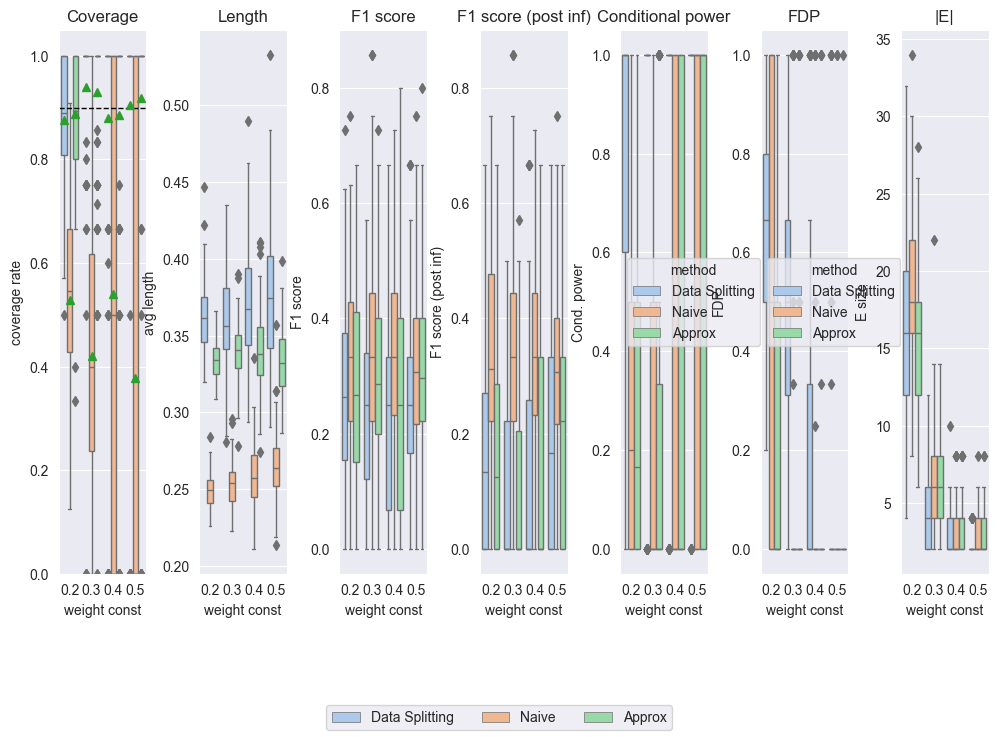

In [5]:
plotting(oper_char, x_axis="weight const", hue="method", plot_size=True)

# Plotting Motivating Example

In [6]:
paths_result = ["GGM_comp_logic1_0_100.csv", "GGM_comp_logic1_100_200.csv"]
oper_char = combine_files(paths_result)

In [21]:
def point_plot(oper_char_df, x_axis='p', hue='method', plot_size=False):
    sns.set_style("white", {'axes.facecolor': 'white', 
                            'axes.grid': True,
                            'axes.linewidth': 2.0,
                            'grid.linestyle': u'--',
                            'grid.linewidth': 4.0,
                            'xtick.major.size': 5.0,
                           })
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    
    alias = {"Approx":"Proposed", 
             "Naive":"Naive", 
             "Data Splitting":"Data Splitting"}
    #order = [alias[meth] for meth in order]

    oper_char_df['method'] = oper_char_df['method'].map(alias)
    
    print("Mean coverage rate/length:")
    print(oper_char_df.groupby([x_axis, hue]).mean())

    cov_plot = sns.pointplot(y=oper_char_df["coverage rate"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           #hue_order=order, 
                           markers='o',
                           ax=ax1)
    #cov_plot.set(title='')
    """cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)"""
    ax1.set_ylabel("Coverage Rate")  # remove y label, but keep ticks
    ax1.set_xlabel("Weight Constant")

    len_plot = sns.pointplot(y=oper_char_df["avg length"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           markers='o',
                           ax=ax2)
    #len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    ax2.set_ylabel("Average Length")  # remove y label, but keep ticks
    ax2.set_xlabel("Weight Constant")

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=4)

    cov_plot.legend_.remove()
    len_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.6, hspace=0.5)
    plt.show()

Mean coverage rate/length:
                             coverage rate  avg length  F1 score   
weight const method                                                
0.2          Data Splitting       0.890777    0.361533  0.249132  \
             Naive                0.539893    0.247478  0.330850   
             Proposed             0.891660    0.333016  0.265358   
0.3          Data Splitting       0.912333    0.362787  0.232682   
             Naive                0.433205    0.252302  0.339884   
             Proposed             0.927101    0.337154  0.280384   
0.4          Data Splitting       0.888417    0.371770  0.246731   
             Naive                0.550000    0.259311  0.338411   
             Proposed             0.910417    0.338973  0.261406   
0.5          Data Splitting       0.890000    0.381153  0.265375   
             Naive                0.378333    0.266162  0.320543   
             Proposed             0.890833    0.332569  0.309793   

                    

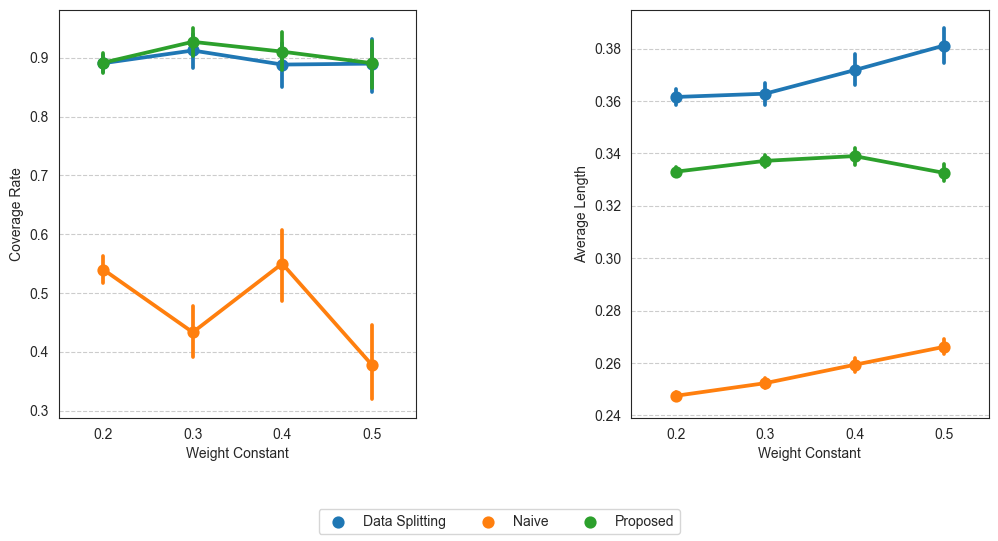

In [22]:
point_plot(oper_char, x_axis="weight const", hue="method", plot_size=True)